In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'bluebear78'
os.environ['KAGGLE_KEY'] = '39d305f791ce074d3a7f8d5630fecba2'

404 - Not Found


In [4]:
!kaggle competitions download -c store-sales-time-series-forecasting
!unzip *.*

 80% 17.0M/21.4M [00:00<00:00, 64.5MB/s]
100% 21.4M/21.4M [00:00<00:00, 79.3MB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample  = pd.read_csv("./sample_submission.csv")

In [8]:
df['date'] = pd.to_datetime(df['date'])
df = df.drop(['id','onpromotion','store_nbr'],axis=1)
df = df.set_index('date').to_period('D')

In [9]:
df

,family,sales
date,,
2013-01-01,AUTOMOTIVE,0.000
2013-01-01,BABY CARE,0.000
2013-01-01,BEAUTY,0.000
2013-01-01,BEVERAGES,0.000
2013-01-01,BOOKS,0.000
...,...,...
2017-08-15,POULTRY,438.133
2017-08-15,PREPARED FOODS,154.553
2017-08-15,PRODUCE,2419.729


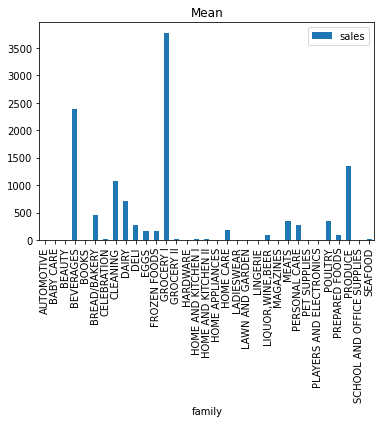

In [11]:
df.groupby(['family']).mean().plot(kind='bar',title='Mean')

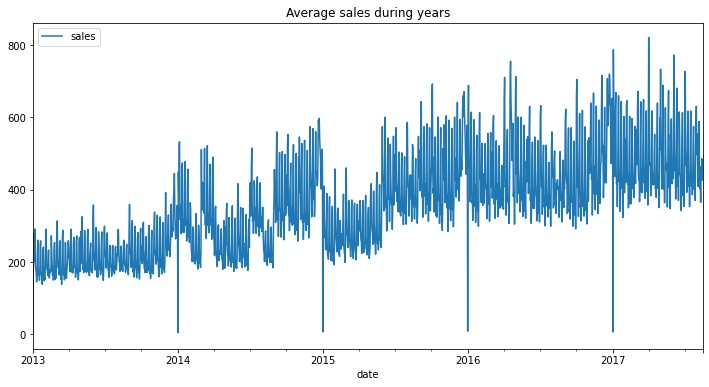

In [12]:
average_sales = pd.DataFrame(df.groupby('date').mean()['sales'])
average_sales.plot(figsize=(12,6),title="Average sales during years")

In [16]:
average_sales[average_sales< 10]

,sales
date,
2013-01-01,1.409438
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
...,...
2017-08-11,NaN
2017-08-12,NaN
2017-08-13,NaN


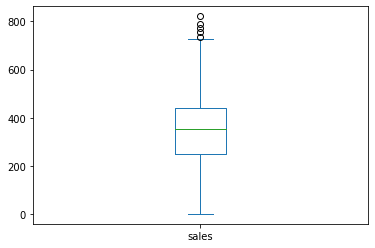

In [18]:
average_sales['sales'].plot.box()

In [20]:
Q1 = average_sales['sales'].quantile(0.25)
Q3 = average_sales['sales'].quantile(0.75)
IQR = Q3 - Q1
average_sales = average_sales.drop(average_sales['sales'].loc[average_sales['sales']>Q3 + 1.5*IQR].index)

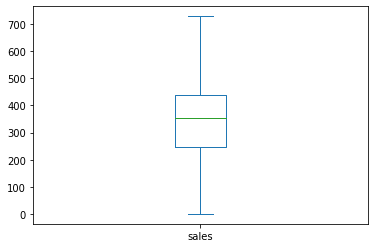

In [22]:
average_sales['sales'].plot.box()

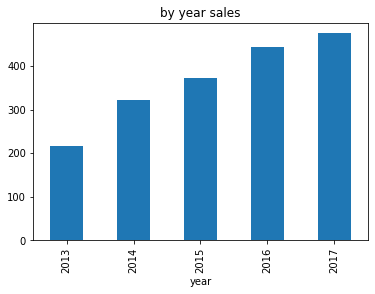

In [24]:
average_sales['year'] = average_sales.index.year
ax=average_sales.groupby('year').mean()['sales'].plot(kind='bar', title="by year sales");

In [25]:
average_sales

,sales,year
date,,
2013-01-01,1.409438,2013
2013-01-02,278.390807,2013
2013-01-03,202.840197,2013
2013-01-04,198.911154,2013
2013-01-05,267.873244,2013
...,...,...
2017-08-11,463.733851,2017
2017-08-12,444.798280,2017
2017-08-13,485.768618,2017


In [29]:
!pip install statsmodels

In [35]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess

ModuleNotFoundError: ignored

In [34]:
from stats.mode